# CNN FOR EVENT CLASSIFICATION

## DATA GENERATION

In [59]:
# DEPENDENCIES

import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import random
import time
import datetime
import pandas as pd

import prenn # for deep learning

In [60]:
# RAW DATA
AVPath = '../DATA/SYN_RES/RESPONSE_AV.npy'
EQPath = '../DATA/SYN_RES/RESPONSE_EQ.npy'
IPPath = '../DATA/SYN_RES/RESPONSE_IP.npy'
SWPath = '../DATA/SYN_RES/RESPONSE_SW.npy'

# Load Data + add noise to the data
RESPONSE_AV = np.load(AVPath)
RESPONSE_EQ = np.load(EQPath)
RESPONSE_IP = np.load(IPPath)
RESPONSE_SW = np.load(SWPath)

## only use part of the data
raw_len = RESPONSE_AV.shape[0]
ratio = 1.0 # ALL DATA USED FOR TRAINING
use_len = int(raw_len * ratio)

RESPONSE_AV = RESPONSE_AV[:use_len]
RESPONSE_EQ = RESPONSE_EQ[:use_len]
RESPONSE_IP = RESPONSE_IP[:use_len]
RESPONSE_SW = RESPONSE_SW[:use_len]

## Check Data Info
print(type(RESPONSE_AV))
print('RESPONSE_AV Shape:', RESPONSE_AV.shape)
print(type(RESPONSE_EQ))
print('RESPONSE_EQ Shape:', RESPONSE_EQ.shape)
print(type(RESPONSE_IP))
print('RESPONSE_IP Shape:', RESPONSE_IP.shape)
print(type(RESPONSE_SW))
print('RESPONSE_SW Shape:', RESPONSE_SW.shape)

<class 'numpy.ndarray'>
RESPONSE_AV Shape: (1000, 6000)
<class 'numpy.ndarray'>
RESPONSE_EQ Shape: (1000, 6000)
<class 'numpy.ndarray'>
RESPONSE_IP Shape: (1000, 6000)
<class 'numpy.ndarray'>
RESPONSE_SW Shape: (1000, 6000)


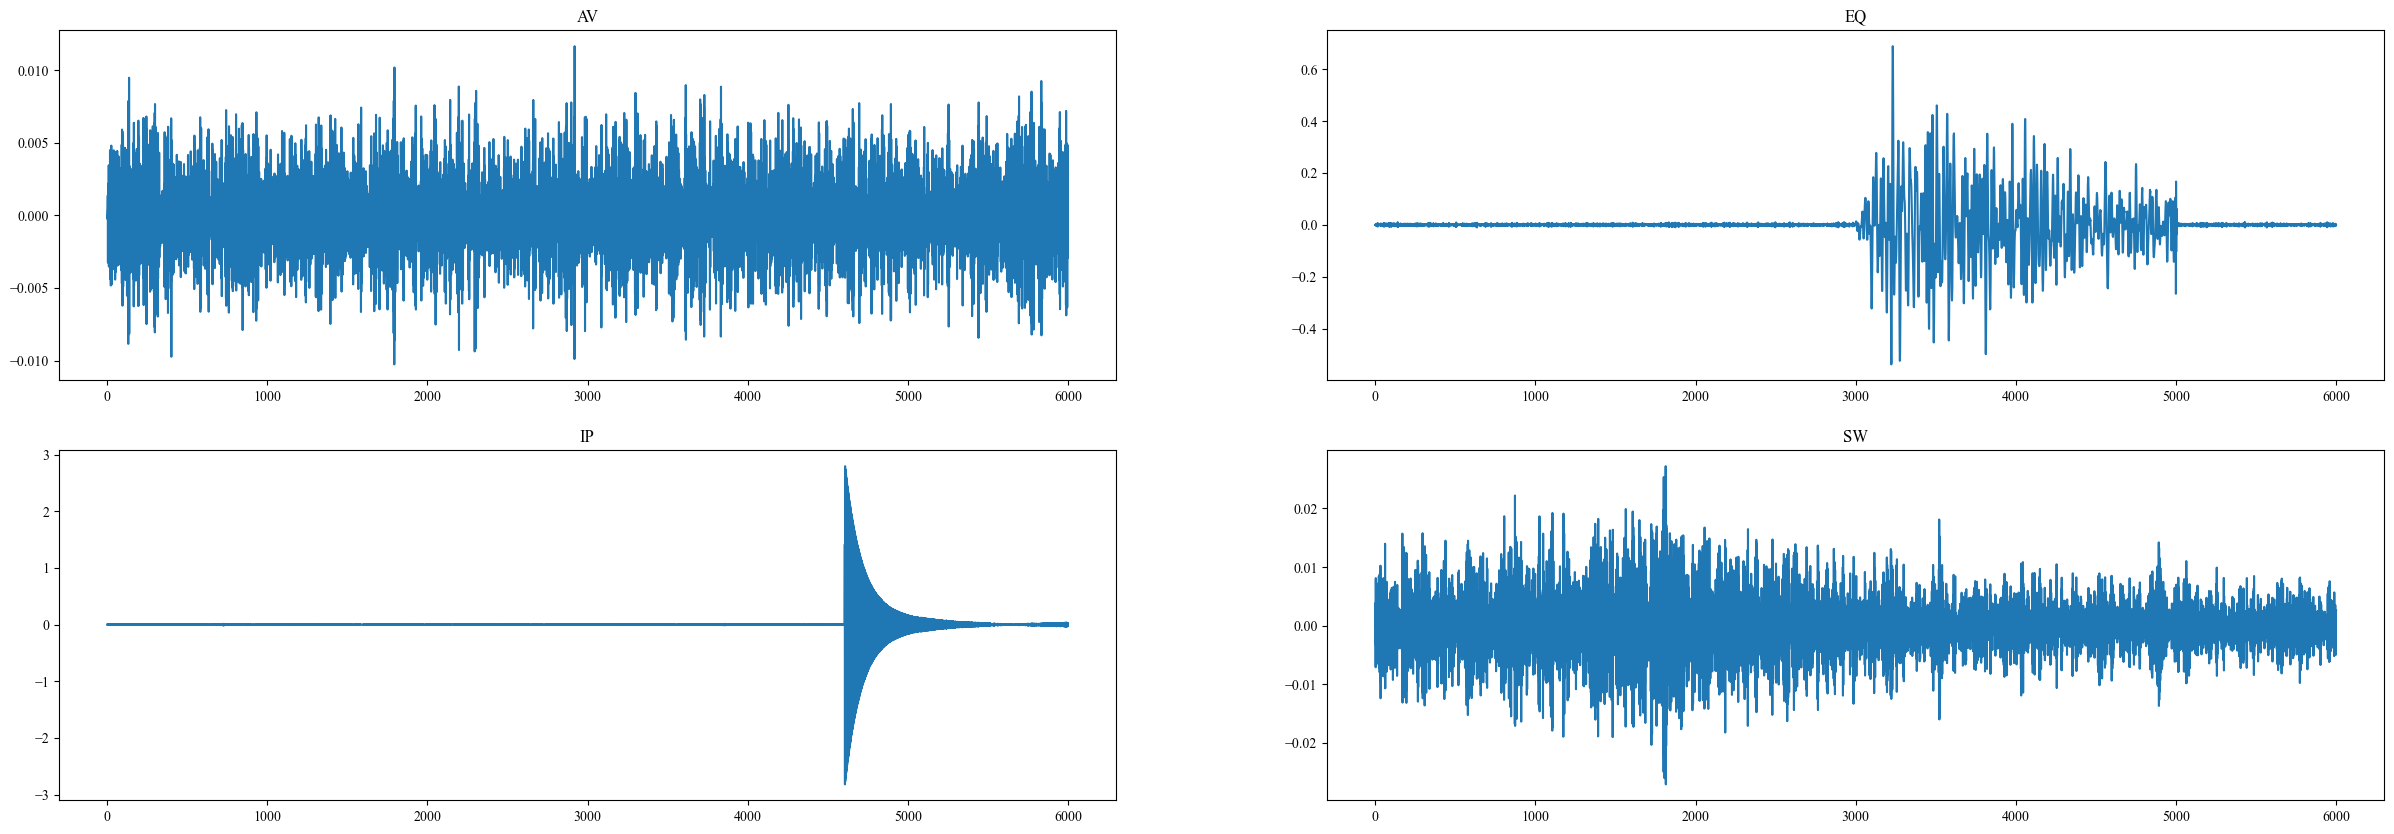

In [61]:
## Check Random Data
selected_idx = np.random.randint(RESPONSE_AV.shape[0])

## Plot Random Data - use subplot
plt.figure(figsize=(30, 10))
plt.subplot(2, 2, 1)
plt.plot(RESPONSE_AV[selected_idx, :])
plt.title('AV')
plt.subplot(2, 2, 2)
plt.plot(RESPONSE_EQ[selected_idx, :])
plt.title('EQ')
plt.subplot(2, 2, 3)
plt.plot(RESPONSE_IP[selected_idx, :])
plt.title('IP')
plt.subplot(2, 2, 4)
plt.plot(RESPONSE_SW[selected_idx, :])
plt.title('SW')
plt.show()

In [62]:
num_type = 4

reshape_shape_0 = RESPONSE_AV.shape[0]
reshape_shape_1 = RESPONSE_AV.shape[1]

LenTS = reshape_shape_1

In [63]:
# Integrate All Data into a 2D Array

## Reshape Data
RESPONSE_AV_RESHAPED = RESPONSE_AV.reshape(reshape_shape_0, reshape_shape_1)
RESPONSE_EQ_RESHAPED = RESPONSE_EQ.reshape(reshape_shape_0, reshape_shape_1)
RESPONSE_IP_RESHAPED = RESPONSE_IP.reshape(reshape_shape_0, reshape_shape_1)
RESPONSE_SW_RESHAPED = RESPONSE_SW.reshape(reshape_shape_0, reshape_shape_1)

## Stack Data
RESPONSE = np.vstack((RESPONSE_AV_RESHAPED, RESPONSE_EQ_RESHAPED, RESPONSE_IP_RESHAPED, RESPONSE_SW_RESHAPED))

## Total Number of Samples
NumSample = RESPONSE.shape[0]
print('Total Number of Samples:', NumSample) 

Total Number of Samples: 4000


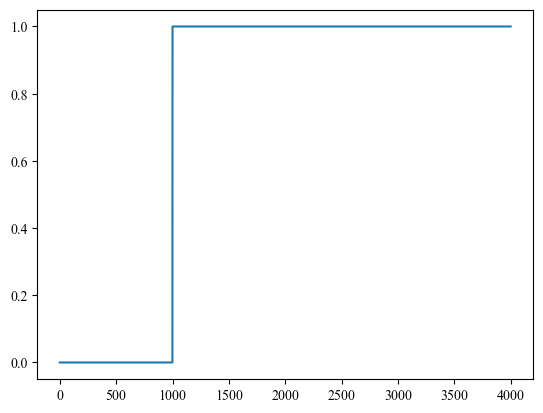

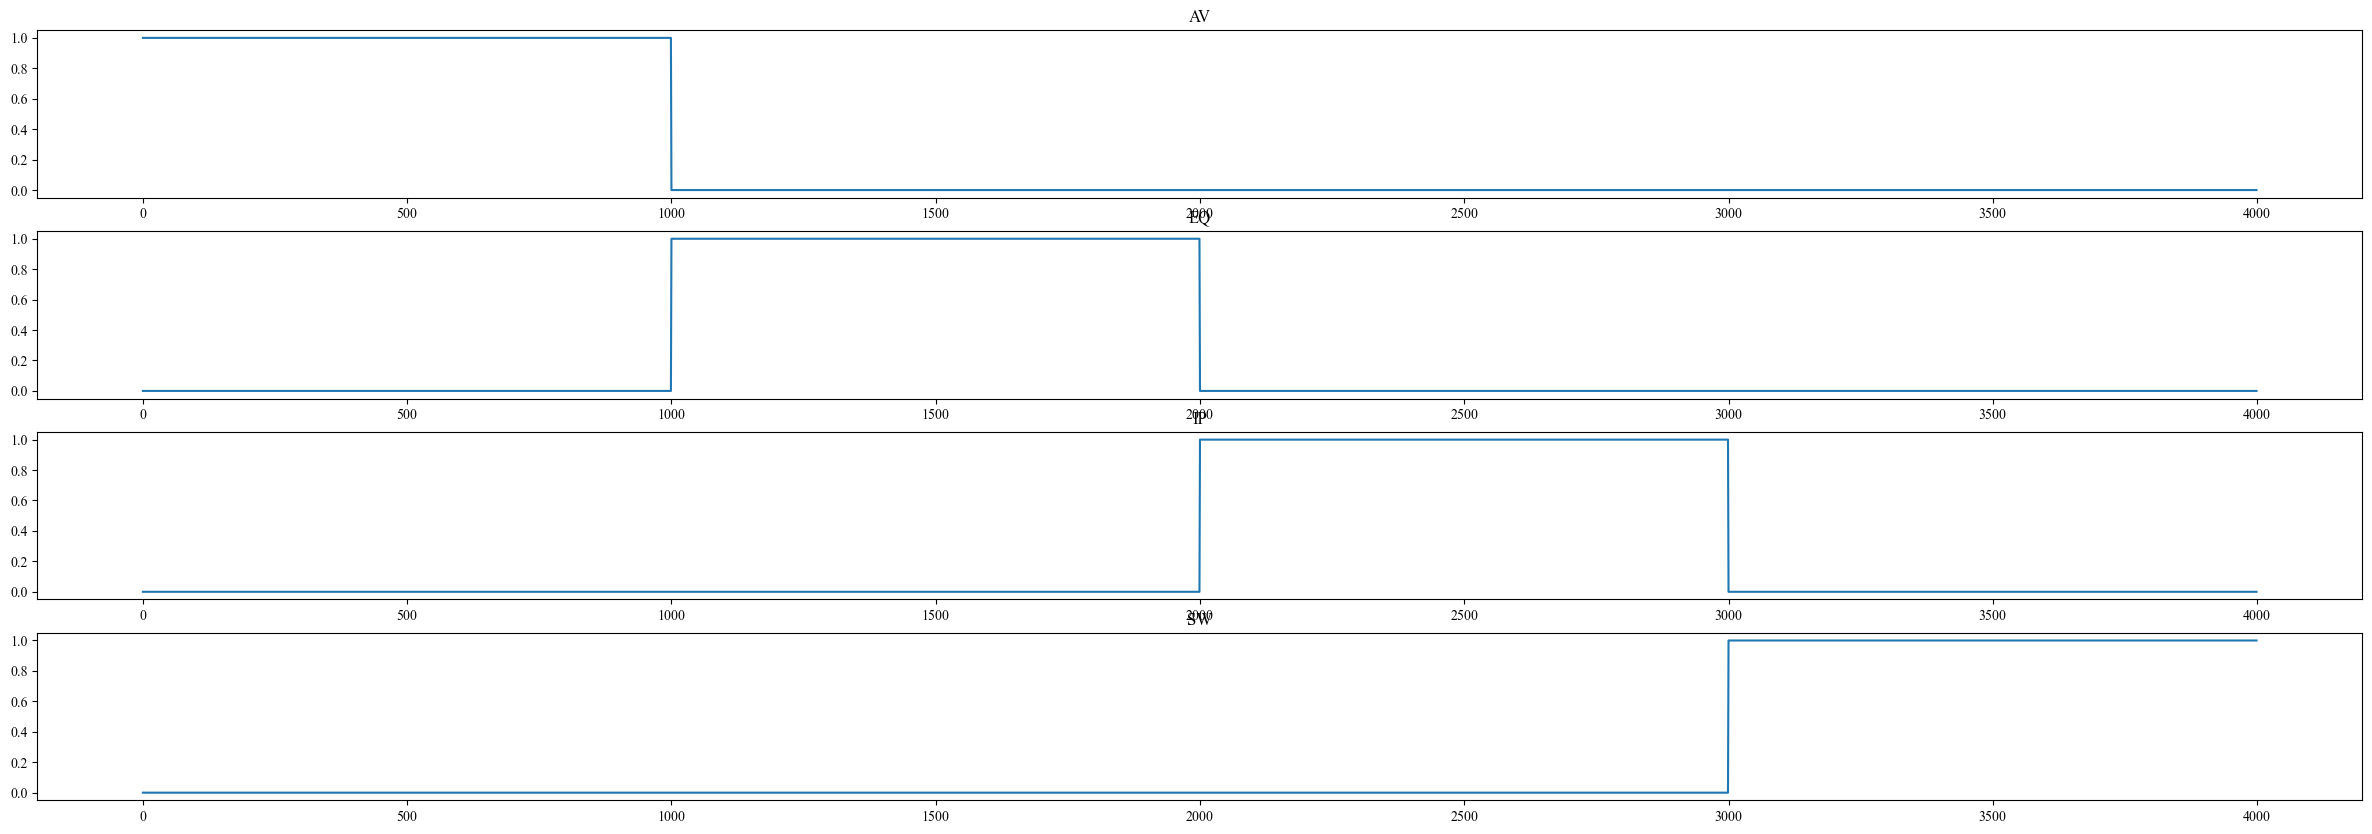

In [64]:
# Real Ground Truth

## Binary Form, Interest or Not
Real_GT_B = np.zeros((RESPONSE.shape[0], 1))

## Real_GT_B, only the first quarter of the data is considered as not interesting
for i in range(RESPONSE_AV.shape[0], RESPONSE.shape[0]):
    Real_GT_B[i] = 1

## plot the binary form
plt.figure()
plt.plot(Real_GT_B)
plt.show()

## Multi-Class Form, Event Type
Real_GT_M = np.zeros((RESPONSE.shape[0], 4))

## Real_GT_M, 4 types of events
for i in range(num_type):
    Real_GT_M[i*reshape_shape_0:(i+1)*reshape_shape_0, i] = 1

## plot the multi-class form, 4 subplots, each subplot for one type of event
plt.figure(figsize=(30, 10))
plt.subplot(4, 1, 1)
plt.plot(Real_GT_M[:, 0])
plt.title('AV')
plt.subplot(4, 1, 2)
plt.plot(Real_GT_M[:, 1])
plt.title('EQ')
plt.subplot(4, 1, 3)
plt.plot(Real_GT_M[:, 2])
plt.title('IP')
plt.subplot(4, 1, 4)
plt.plot(Real_GT_M[:, 3])
plt.title('SW')
plt.show()

In [65]:
# process parameters

# nn input length
nn_in_len = 128

# time step
dt = 0.01

# nperseg
nperseg = 128

# output length

In [66]:
NN_IN_DATA = np.zeros((NumSample, nn_in_len))

for i in range(NumSample):
    NN_IN_DATA[i, :] = prenn.prenn(RESPONSE[i, :].reshape(1, -1), dt, nperseg, nn_in_len)

In [67]:
# check whether nan exists
nan_idx = np.argwhere(np.isnan(NN_IN_DATA))
print(nan_idx)

[]


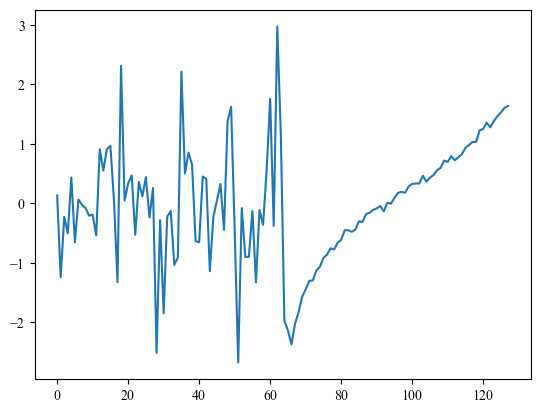

In [68]:
# plot to check
# selected_idx = np.random.randint(NumSample)
selected_idx = 599
plt.figure()
plt.plot(NN_IN_DATA[selected_idx, :])
plt.show()

In [69]:
# save data as npy file
np.save('NN_IN_DATA.npy', NN_IN_DATA)

In [70]:
# LABELS
NN_IN_LABEL = np.zeros((NumSample, 1))
NN_IN_LABEL_1HOT = np.zeros((NumSample, 4))

In [71]:
# NN_IN_LABEL & NN_IN_LABEL_1HOT
for i in range(NumSample):
    if i < reshape_shape_0:
        NN_IN_LABEL[i] = 0
        NN_IN_LABEL_1HOT[i, 0] = 1
    elif i < reshape_shape_0 * 2:
        NN_IN_LABEL[i] = 1
        NN_IN_LABEL_1HOT[i, 1] = 1
    elif i < reshape_shape_0 * 3:
        NN_IN_LABEL[i] = 2
        NN_IN_LABEL_1HOT[i, 2] = 1
    else:
        NN_IN_LABEL[i] = 3
        NN_IN_LABEL_1HOT[i, 3] = 1

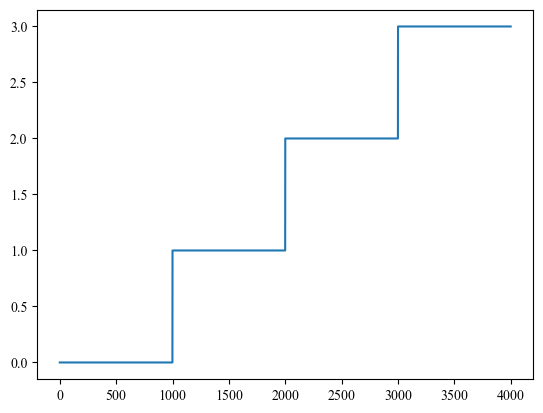

In [72]:
## plot NN_IN_LABEL
plt.figure()
plt.plot(NN_IN_LABEL)
plt.show()

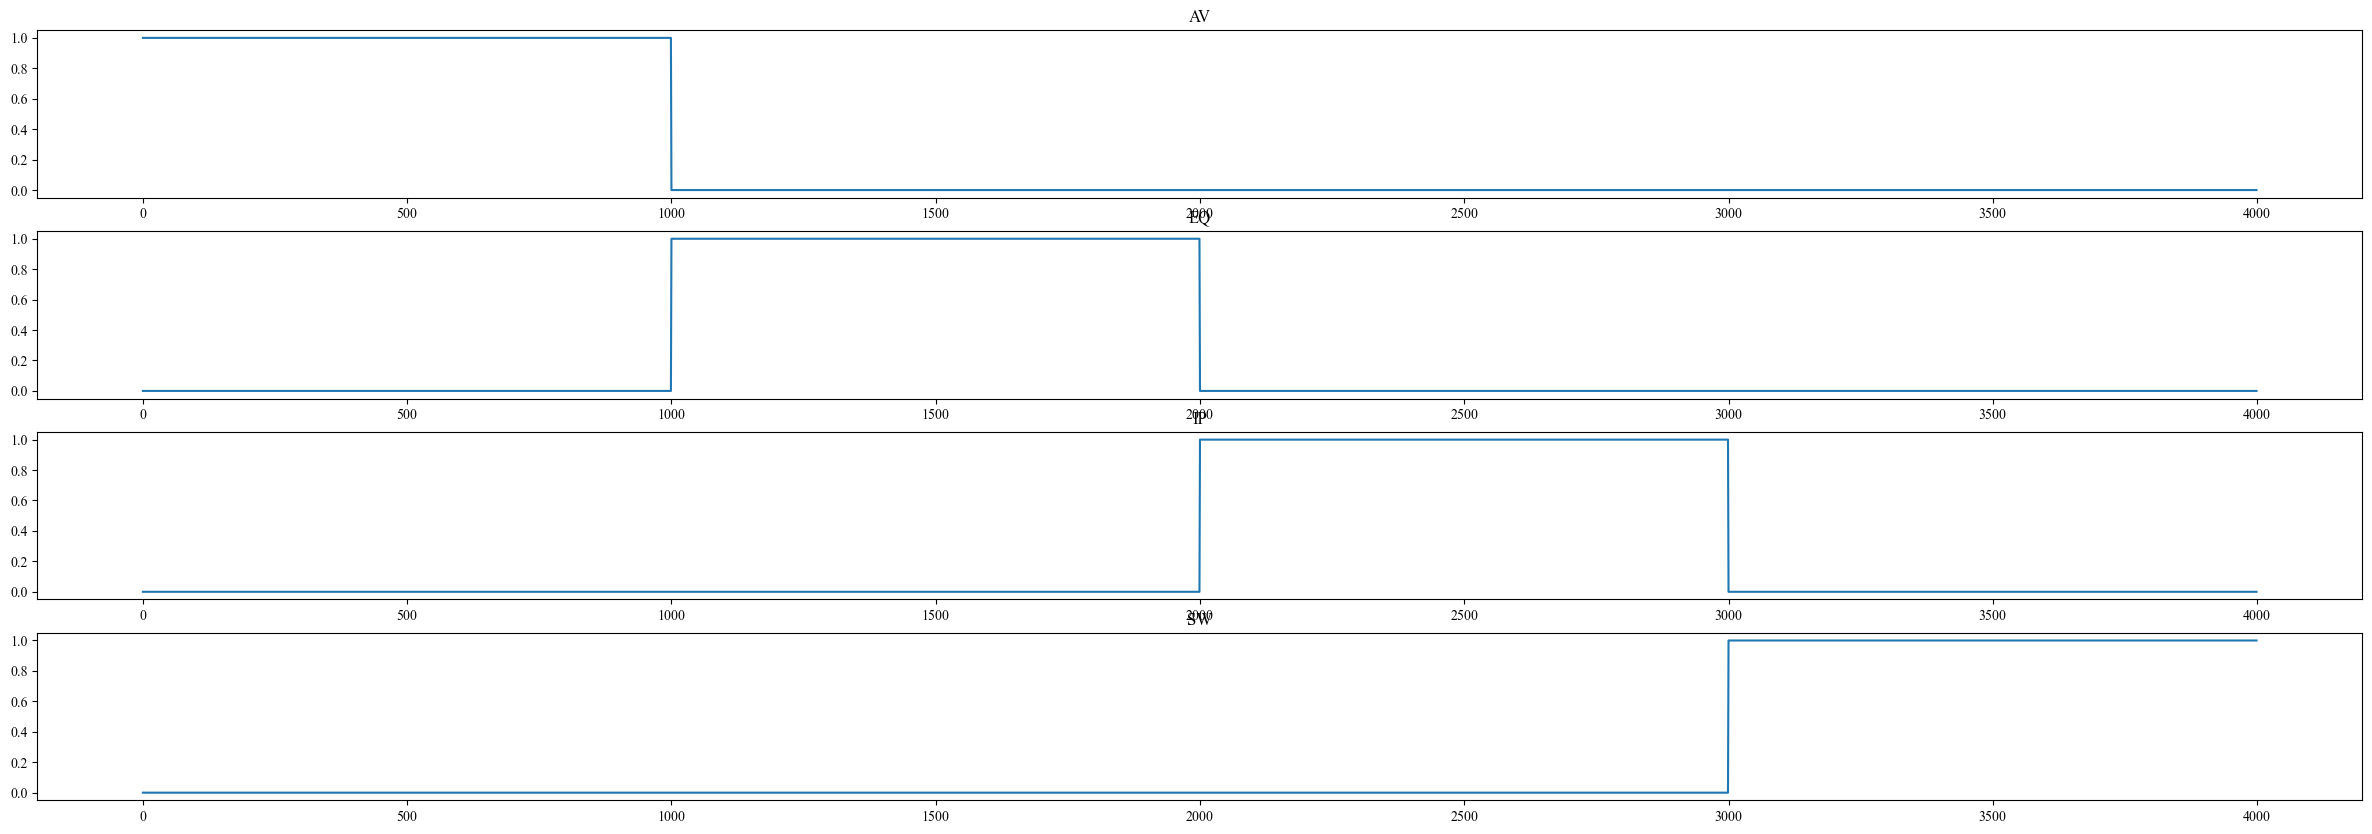

In [73]:
## plot NN_IN_LABEL_1HOT
plt.figure(figsize=(30, 10))
plt.subplot(4, 1, 1)
plt.plot(NN_IN_LABEL_1HOT[:, 0])
plt.title('AV')
plt.subplot(4, 1, 2)
plt.plot(NN_IN_LABEL_1HOT[:, 1])
plt.title('EQ')
plt.subplot(4, 1, 3)
plt.plot(NN_IN_LABEL_1HOT[:, 2])
plt.title('IP')
plt.subplot(4, 1, 4)
plt.plot(NN_IN_LABEL_1HOT[:, 3])
plt.title('SW')
plt.show()

In [74]:
# save data as npy file
np.save('NN_IN_LABEL.npy', NN_IN_LABEL)
np.save('NN_IN_LABEL_1HOT.npy', NN_IN_LABEL_1HOT)

## CNN MODEL FOR CLASSIFICATION

In [75]:
# dependencies
import numpy as np
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import tf2onnx
import onnx

In [76]:
# data preparation

data = np.load('NN_IN_DATA.npy')
# expand dimensions to 3D
data = np.expand_dims(data, axis=2)

print(data.shape)

label_1h = np.load('NN_IN_LABEL_1HOT.npy').astype(int)
print(label_1h.shape)

label = np.argmax(label_1h, axis=1).astype(int)
label = label.reshape((-1,1))

print(label.shape)

(4000, 128, 1)
(4000, 4)
(4000, 1)


In [77]:
# split data as x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

# check info
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 128, 1)
(800, 128, 1)
(3200, 1)
(800, 1)


In [78]:
num_classes = np.unique(label).shape[0]
print(num_classes)

4


In [79]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=4, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    # conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    # conv2 = keras.layers.BatchNormalization()(conv2)
    # conv2 = keras.layers.ReLU()(conv2)

    # conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    # conv3 = keras.layers.BatchNormalization()(conv3)
    # conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv1)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
# keras.utils.plot_model(model, show_shapes=True)

In [80]:
epochs = 150
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3165 - sparse_categorical_accuracy: 0.4680 - val_loss: 1.3390 - val_sparse_categorical_accuracy: 0.2859 - learning_rate: 0.0010
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2724 - sparse_categorical_accuracy: 0.4715 - val_loss: 1.3076 - val_sparse_categorical_accuracy: 0.3531 - learning_rate: 0.0010
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2349 - sparse_categorical_accuracy: 0.4606 - val_loss: 1.2711 - val_sparse_categorical_accuracy: 0.4922 - learning_rate: 0.0010
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2098 - sparse_categorical_accuracy: 0.4365 - val_loss: 1.2291 - val_sparse_categorical_accuracy: 0.4906 - learning_rate: 0.0010
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1903 - sparse_categorical_accuracy: 0.4360 - val_loss: 1.1871 - val_sparse_categorical_accuracy: 0.4812 - learning_rate: 0.0010
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [81]:
# model = keras.saving.load_model("best_model.keras")

# test_loss, test_acc = model.evaluate(x_test, y_test)

# print("Test accuracy", test_acc)
# print("Test loss", test_loss)

In [82]:
# Load the model
model = keras.saving.load_model("best_model.keras")

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1675 - sparse_categorical_accuracy: 0.9780  
Test accuracy: 0.9750000238418579
Test loss: 0.1743813455104828


In [83]:
# model info
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 128, 4)         │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 4)         │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 4)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142 (572.00 B)

 Trainable params: 44 (176.00 B)

 Non-trainable params: 8 (32.00 B)

 Optimizer params: 90 (364.00 B)

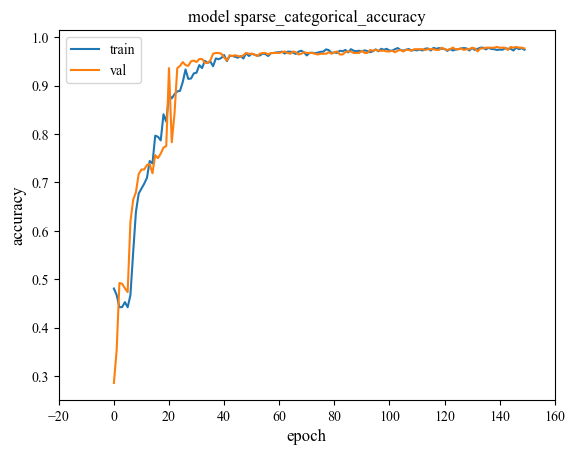

In [84]:
import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Plot training history
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel("accuracy", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")

# Set x-axis limits
plt.xlim(-20, 160)

# Save the figure
plt.savefig("CNN_Classifier.png")

# Show the plot
plt.show()
plt.close()



In [85]:
# save model
model.save("cnn_model.keras")

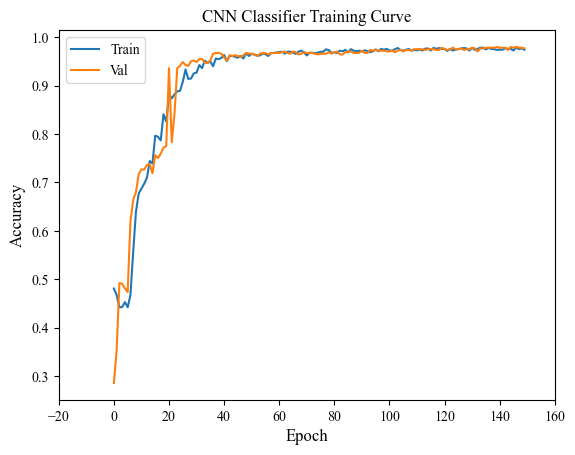

In [86]:
import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Plot training history
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("CNN Classifier Training Curve")
plt.ylabel("Accuracy", fontsize="large")
plt.xlabel("Epoch", fontsize="large")
plt.legend(["Train", "Val"], loc="best")

# Set x-axis limits
plt.xlim(-20, 160)

# Save the figure
plt.savefig("CNN_Classifier.png")

# Show the plot
plt.show()
plt.close()

In [87]:
# save x_test, y_test as npy file, this partition is consistent with the partition in the previous step

# x_test save
np.save('x_test.npy', x_test)

print(x_test.shape)

# y_test save, 1-hot encoding first
tmp_y_test = np.zeros((y_test.shape[0], num_classes))
for i in range(y_test.shape[0]):
    tmp_y_test[i][y_test[i][0]] = 1

np.save('y_test.npy', tmp_y_test)

print(tmp_y_test.shape)

(800, 128, 1)
(800, 4)
